In [1]:
# ===== Step 1: Import Libraries =====
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# ==== Step 2: Load Preprocessed Data =====
X_train = pd.read_csv("X_train_final.csv")
X_test = pd.read_csv("X_test_final.csv")
y_train = pd.read_csv("y_train_final.csv").values.ravel()
y_test = pd.read_csv("y_test_final.csv").values.ravel()

print("✅ Data Loaded Successfully!")
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

✅ Data Loaded Successfully!
Train shape: (17411, 12) | Test shape: (5581, 12)


In [4]:
# ===== Step 3: Try Different SVM Kernels =====
kernels = ['linear', 'rbf', 'poly']
accuracies = []

for kernel in kernels:
    model = SVC(kernel=kernel, C=1, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"\n🔹 Kernel: {kernel}")
    print(f"Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


🔹 Kernel: linear
Accuracy: 0.8380
[[1822  521]
 [ 383 2855]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581


🔹 Kernel: rbf
Accuracy: 0.8249
[[1870  473]
 [ 504 2734]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2343
           1       0.85      0.84      0.85      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.82      0.83      5581


🔹 Kernel: poly
Accuracy: 0.8323
[[1795  548]
 [ 388 2850]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      2343
           1       0.84      0.88      0.86      3238

 

C:\Users\LOQ\AppData\Local\Temp\ipykernel_3208\3827245805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kernels, y=accuracies, palette='viridis')


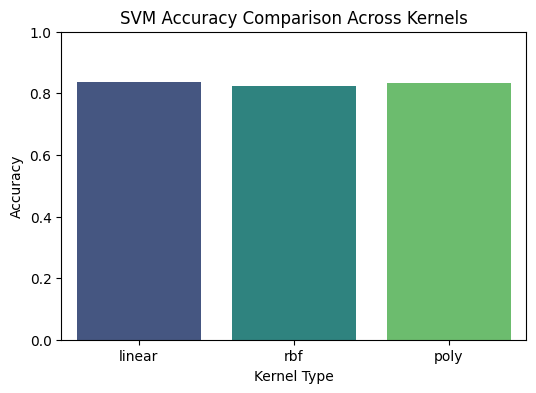

In [5]:
# ===== Step 4: Visualization (Bar Chart) =====
plt.figure(figsize=(6,4))
sns.barplot(x=kernels, y=accuracies, palette='viridis')
plt.title('SVM Accuracy Comparison Across Kernels')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [6]:
# ==== Step 5: Choose Best Model (Optional) =====
best_kernel = kernels[accuracies.index(max(accuracies))]
print(f"\n✅ Best Kernel: {best_kernel} with Accuracy: {max(accuracies):.4f}")


✅ Best Kernel: linear with Accuracy: 0.8380
